In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime
import time
import random
import json
import pickle

In [2]:
with open("dispatch_against_daily_sales_04-01.json") as f:
    a = f.readlines()
json_data = [json.loads(i) for i in a]

In [3]:
for i in range(len(json_data)):
    if 'Lifting Date' not in json_data[i].keys(): continue
    json_data[i]['Lifting Date'] = datetime.datetime.fromtimestamp(int(json_data[i]['Lifting Date']['$date']['$numberLong'][:10]))

In [4]:
df = pd.DataFrame.from_dict(json_data)
df.dropna(inplace = True)
df.drop(columns = ['_id'], inplace = True)
df.head()

,Consignee Name,Grade& Size(Product Description),Lifted Qty,Lifting Date,Sales Order No,Truck No
1,RAHUL COKE PRIVATE LTD,Washery-3 STM/FSA,20.39,2018-08-15 05:30:00,19701304782,JH10U8841
2,RAHUL COKE PRIVATE LTD,Washery-3 STM/FSA,20.38,2018-08-08 05:30:00,19701304782,JH10U8841
3,O S D COKE PVT.LTD.,Washery-3 STM/FSA,20.02,2018-08-15 05:30:00,19701504830,JH02Q1835
4,O S D COKE PVT.LTD.,Washery-3 STM/FSA,20.22,2018-08-08 05:30:00,19701504830,JH02Q1835
5,GANPATI UDYOG,Washery-3 STM/FSA,16.08,2018-08-15 05:30:00,19701704893,JH10Q7915


In [5]:
df['Lifted Qty'] = df['Lifted Qty'].astype('float')

### Consignee Name
#### Consignee Names grouped with their Total Lifted Quantity

- `M/S MAITHON RIGHT BANK THERMAL POWER PROJECT` and `MAITHON POWER LIMITED` Lifted Max Qty (1119203.79)

In [7]:
temp_df

,Consignee Name,Lifted Qty
283,M/S MAITHON RIGHT BANK THERMAL POWER PROJECT,600511.810
365,MAITHON POWER LIMITED,518691.980
46,Adhunik Power And natural Resources ltd.,404093.660
213,Jaypee Nigrie Super Thermal Power Project,368901.500
660,TATA STEEL LIMITED,338477.670
100,CESC Limited,253949.056
159,HALDIA ENERGY LIMITED,225858.870
288,M/S NABHA POWER LIMITED,220029.940
511,SAIL- CHASNALA WASHERY,197717.720
110,"D.V.C.-RAGHUNATHPUR,TPS,PHASE-1, UNIT-1",197580.550


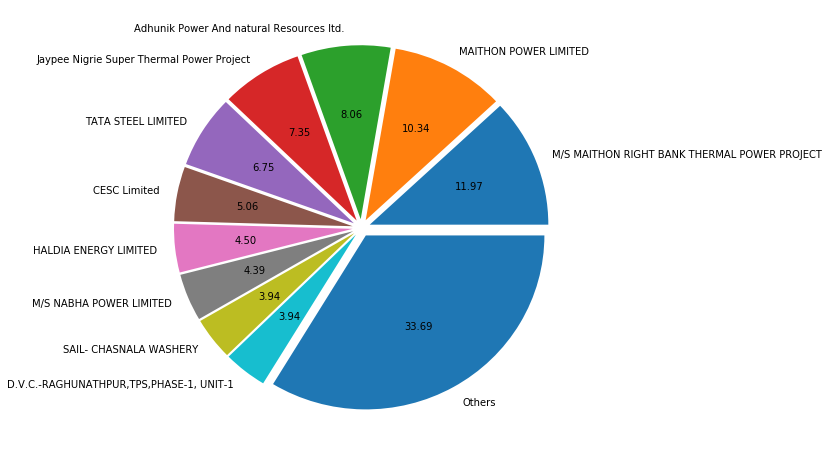

In [6]:
temp_df = df[['Consignee Name', 'Lifted Qty']].groupby('Consignee Name').sum().reset_index().sort_values('Lifted Qty', ascending = False)
top_ten = temp_df[:10]
others = np.sum(temp_df[10:]['Lifted Qty'])

fig = plt.figure(figsize = (8, 8))
plt.pie(
            np.append(top_ten['Lifted Qty'].values, others),
            labels = list(top_ten['Consignee Name']) + ['Others'],
            explode = [0.05]*11,
            autopct = '%.2f'
        )
plt.show()

#### Consignee Names sorted with number Of Loadings

In [55]:
df['Consignee Name'].value_counts()

M/S MAITHON RIGHT BANK THERMAL POWER PROJECT    39799
MAITHON POWER LIMITED                           33414
Adhunik Power And natural Resources ltd.        24642
Jaypee Nigrie Super Thermal Power Project       23711
TATA STEEL LIMITED                              22142
CESC Limited                                    17556
HALDIA ENERGY LIMITED                           15467
M/S NABHA POWER LIMITED                         14890
SAIL- CHASNALA WASHERY                          13277
D.V.C.-RAGHUNATHPUR,TPS,PHASE-1, UNIT-1         11263
DB POWER LIMITED UNIT 1                          7870
Jaypee Bina Thermal Power Plant                  6058
The TATA Power Company Ltd.                      5882
M/S PRAYAGRAJ POWER GENERATION COMPANY LTD.      5574
JAI BALAJI INDUSTRIES LIMITED                    3339
GVK Power (Goindwal Sahib) Limited               2735
M/S JHAJJHAR POWER LTD.(MGTPP)                   2417
MAHARAJA                                         1692
VINAYAK SUPPORT SERVICES PRI

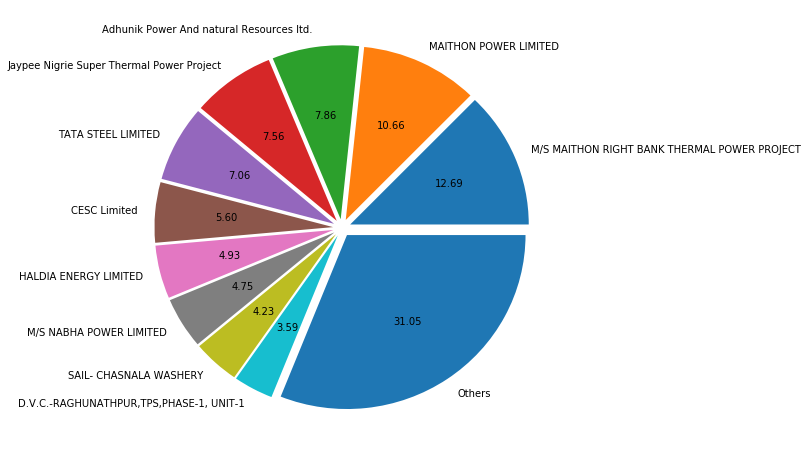

In [56]:
top_ten = df['Consignee Name'].value_counts()[:10]
others = np.sum(df['Consignee Name'].value_counts()[10:])

fig = plt.figure(figsize = (8, 8))
plt.pie(
            np.append(top_ten.values, others),
            labels = list(top_ten.index) + ['Others'],
            explode = [0.05]*11,
            autopct = '%.2f'
        )
plt.show()

### Trucks
#### 13,421 Unique Trucks were used to lift 5,015,874.226 Quantity for 8,485 Sales Orders from 01st Jan 2018 to 01st Jan 2019

In [129]:
len(df['Truck No'].unique())

13421

### No. of Trucks used by Consignees (sorted)

In [128]:
df[['Consignee Name', 'Truck No']].groupby('Consignee Name')['Truck No'].nunique().sort_values(ascending = False)
# count().reset_index().sort_values('Truck No', ascending = False)

Consignee Name
M/S MAITHON RIGHT BANK THERMAL POWER PROJECT    2728
MAITHON POWER LIMITED                           2319
Adhunik Power And natural Resources ltd.        1953
HALDIA ENERGY LIMITED                           1458
Jaypee Nigrie Super Thermal Power Project       1354
CESC Limited                                    1142
M/S NABHA POWER LIMITED                         1030
D.V.C.-RAGHUNATHPUR,TPS,PHASE-1, UNIT-1          985
Jaypee Bina Thermal Power Plant                  863
DB POWER LIMITED UNIT 1                          719
The TATA Power Company Ltd.                      578
TATA STEEL LIMITED                               506
GVK Power (Goindwal Sahib) Limited               484
JAI BALAJI INDUSTRIES LIMITED                    470
SINGH NATURAL RESOURCE PVT LTD                   389
M/S PRAYAGRAJ POWER GENERATION COMPANY LTD.      367
B K ENTERPRISES                                  362
SAIL- CHASNALA WASHERY                           356
VINAYAK SUPPORT SERVICES PRIVAT

### No Of Trucks Required for Completing Sales Order No.s (sorted)

In [13]:
df[['Sales Order No', 'Truck No']].groupby('Sales Order No')['Truck No'].nunique().sort_values(ascending = False).reset_index()
# count().reset_index().sort_values('Truck No', ascending = False)

,Sales Order No,Truck No
0,19835405846,422
1,19835305845,419
2,19704004682,399
3,19763007457,365
4,19008605751,360
5,19707304669,341
6,19835204644,325
7,19712009134,319
8,19704004369,312
9,19711208312,305


In [ ]:
# df[['Consignee Name', 'Sales Order No', 'Truck No']].groupby(['Sales Order No', 'Consignee Name']).count().sort_values('Truck No', ascending = False)
# # count().reset_index().sort_values('Truck No', ascending = False)

### Grade & Size (Product Description)
#### Grade & Size (Product Description) with respect to their Total Lifted Quantity (Sorted)

In [68]:
most_lifted = df[['Grade& Size(Product Description)', 'Lifted Qty']].groupby('Grade& Size(Product Description)').sum().sort_values('Lifted Qty', ascending = False)
most_lifted

,Lifted Qty
Grade& Size(Product Description),
Washery-4 ROM,1777089.386
Washery-4 ROM(POWER PLANT),815331.860
Washery-II ROM,502919.190
G8 (4901 KCal/Kg - 5200 KCal/Kg) ROM,288019.930
Washery-3 STM,200967.230
Washery-3 STM/FSA,169213.570
G8 (4901 KCal/Kg - 5200 KCal/Kg) ROM(POWER PLANT),121947.840
Rejects-Ungraded NO SIZE,107823.800
G6 (5501 KCal/Kg - 5800 KCal/Kg) ROM(POWER PLANT),101439.540


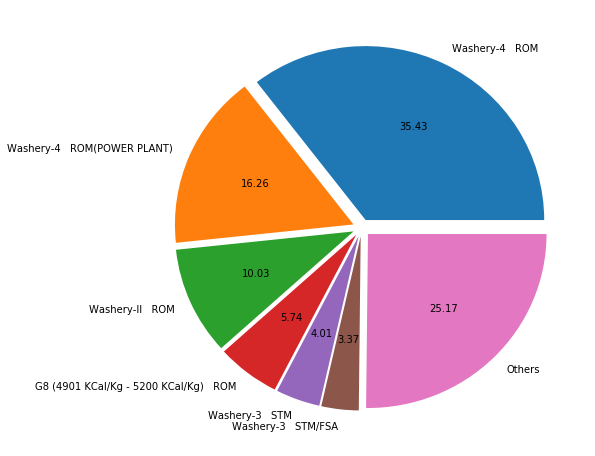

In [75]:
top_ten = most_lifted['Lifted Qty'][:6]
others = np.sum(most_lifted['Lifted Qty'][6:])

fig = plt.figure(figsize = (8, 8))
plt.pie(
            np.append(top_ten.values, others),
            labels = list(top_ten.index) + ['Others'],
            explode = [0.05]*7,
            autopct = '%.2f'
        )
plt.show()

### Grade & Size (Product Description) with respect to *No Of Times it has been lifted*

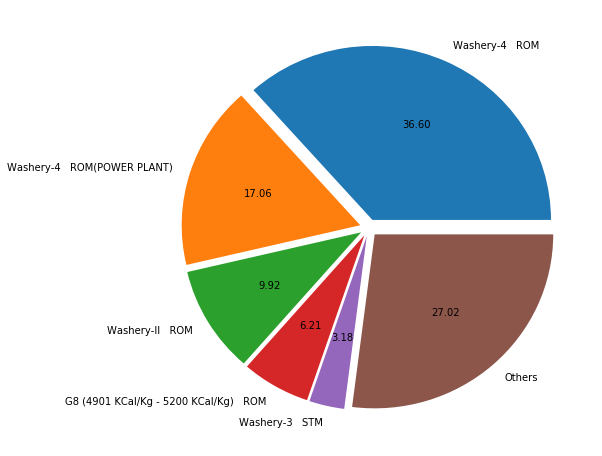

In [59]:
top_ten = df['Grade& Size(Product Description)'].value_counts()[:5]
others = np.sum(df['Grade& Size(Product Description)'].value_counts()[5:])

fig = plt.figure(figsize = (8, 8))
plt.pie(
            np.append(top_ten.values, others),
            labels = list(top_ten.index) + ['Others'],
            explode = [0.05]*6,
            autopct = '%.2f'
        )
plt.show()

### Lifted Quantity
#### According to the frequency distribution of Lifted Qty, Most of the trucks carried around 15 Quantity Of the respective product

/home/revant/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


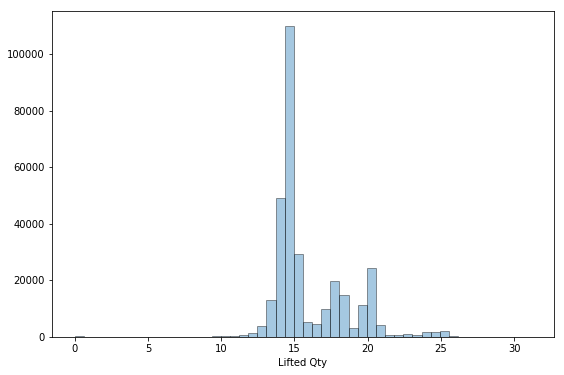

In [80]:
fig = plt.figure(figsize = (9, 6))
sns.distplot(df['Lifted Qty'], hist = True, kde = False, hist_kws={'edgecolor':'black'})

### Loading Dates
- Density Distribution of Loading Dates is more or less constant

/home/revant/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([736800., 736850., 736900., 736950., 737000., 737050., 737100.]),
 <a list of 7 Text xticklabel objects>)

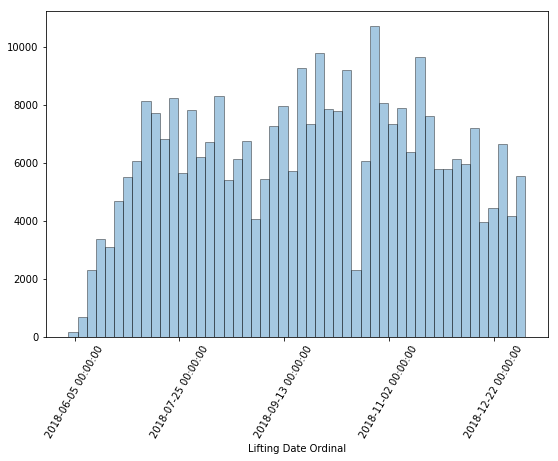

In [88]:
df['Lifting Date Ordinal'] = df['Lifting Date'].apply(lambda x : x.toordinal())
fig = plt.figure(figsize = (9, 6))
ax = sns.distplot(df['Lifting Date Ordinal'], hist = True, kde = False, hist_kws={'edgecolor':'black'})
texts = [datetime.datetime.fromordinal(int(i)) for i in ax.get_xticks()]
ax.set_xticklabels(texts)
plt.xticks(rotation=60)

In [100]:
df['Lifting Date Month'] = df['Lifting Date'].apply(lambda x: datetime.datetime.strftime(x, "%Y - %m (%B)"))
temp_df = df[['Lifting Date Month', 'Lifted Qty']].groupby('Lifting Date Month').sum().reset_index()
temp_df

,Lifting Date Month,Lifted Qty
0,2018 - 06 (June),248143.570
1,2018 - 07 (July),761708.620
2,2018 - 08 (August),703096.180
3,2018 - 09 (September),783103.010
4,2018 - 10 (October),855929.580
5,2018 - 11 (November),843590.796
6,2018 - 12 (December),713989.240
7,2019 - 01 (January),106313.230


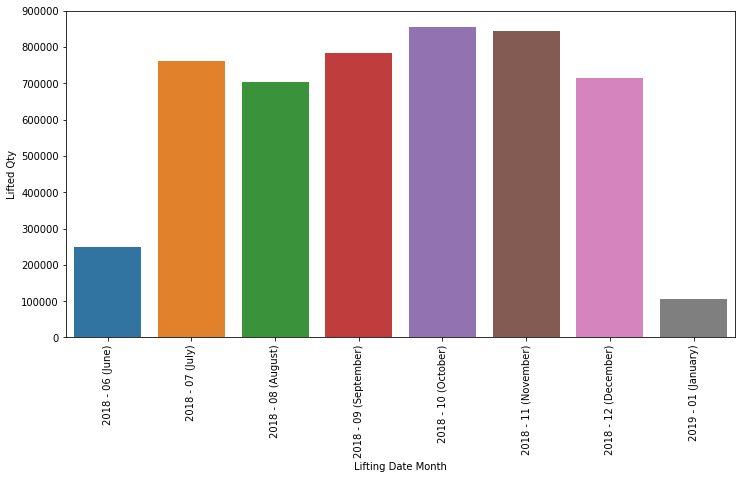

In [101]:
fig =plt.figure(figsize = (12, 6))
# temp_df = df['Lifting Date Month'].value_counts().reset_index().sort_values('index')
g = sns.barplot(x = 'Lifting Date Month', y = 'Lifted Qty', data = temp_df)
plt.xticks(rotation=90)
del temp_df

### Heaviest Sales Orders (sorted)

In [115]:
mostlifted_sales_orders = df[['Sales Order No', 'Lifted Qty']].groupby('Sales Order No').sum().sort_values('Lifted Qty', ascending = False).reset_index()
mostlifted_sales_orders
# [mostlifted_sales_orders['Lifted Qty'] < 20]

,Sales Order No,Lifted Qty
0,19008605751,29999.91
1,19006011321,29997.11
2,19001104665,22999.90
3,19710014391,20000.00
4,19707304669,20000.00
5,19008312313,20000.00
6,19705004684,19999.53
7,19013207410,19999.40
8,19819813490,19999.22
9,19762807408,19992.91


/home/revant/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]), <a list of 9 Text xticklabel objects>)

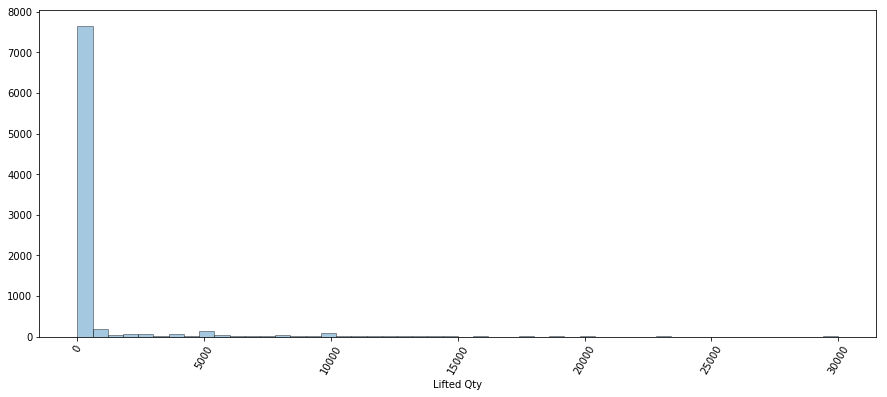

In [160]:
fig = plt.figure(figsize = (15, 6))
ax = sns.distplot(mostlifted_sales_orders['Lifted Qty'], hist = True, kde = False, hist_kws={'edgecolor':'black'})
# texts = [datetime.datetime.fromordinal(int(i)) for i in ax.get_xticks()]
# ax.set_xticklabels(texts)
plt.xticks(rotation=60)